In [8]:
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# Bipartite graphs II

Parts of this notebooks are based on or inspired by [Eric Ma](https://ericmjl.github.io/)'s code from his amazing course:

https://campus.datacamp.com/courses/intermediate-network-analysis-in-python/

## Create bipartite graph

In [39]:
# Create nodes
customers = ['cust_' + f'{i:02d}' for i in range(200)]
prods = ['prod_' + f'{i:02d}' for i in range(70)]

# Generate random edges
edges = [(np.random.choice(customers), np.random.choice(prods)) for i in range(1100)]

In [40]:
# Initialize a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(customers, bipartite = 'customers')
G.add_nodes_from(prods, bipartite = 'prods')

# Add edges
G.add_edges_from(set(edges))

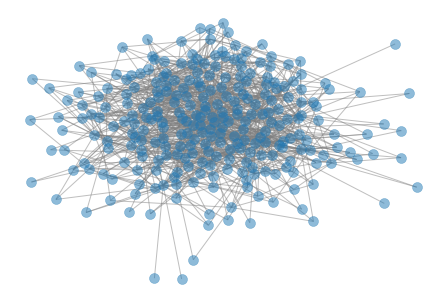

In [51]:
nx.draw(G, alpha = .5, node_size = 100, edge_color = 'gray')

## Compute projections

In [52]:
# First, we need to get a list of all nodes within each category
customers = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'customers']
prods = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'prods']

# Compute proojections:
cust_proj = nx.bipartite.projected_graph(G, customers)
prod_proj  = nx.bipartite.projected_graph(G, prods)

## Plot projections degree centrality

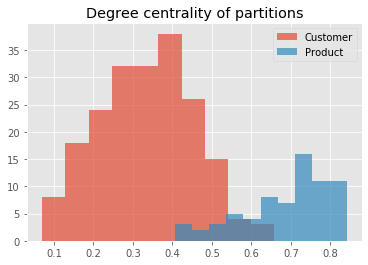

In [53]:
# Plot the degree centrality distribution of the peopleG graph
cust_degr_cent = nx.degree_centrality(cust_proj).values()
prod_degr_cent = nx.degree_centrality(prod_proj).values()

plt.figure()  


plt.hist(cust_degr_cent, label = 'Customer', alpha = .7)
plt.hist(prod_degr_cent, label = 'Product', alpha = .7)

# plt.yscale('log')

plt.title('Degree centrality of partitions')
plt.legend()
plt.show()


Note, that products have larger degree centrality than customers. That's because there are fewer products than customers.